In [74]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy as hc

from IPython.display import Javascript
from string import Template

from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

import altair as alt
alt.renderers.enable("default")
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

In [2]:
boston_dataset = datasets.load_boston()

In [3]:
boston_df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston_df["Median_Home_Value"] = boston_dataset.target*1000.

In [4]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median_Home_Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0


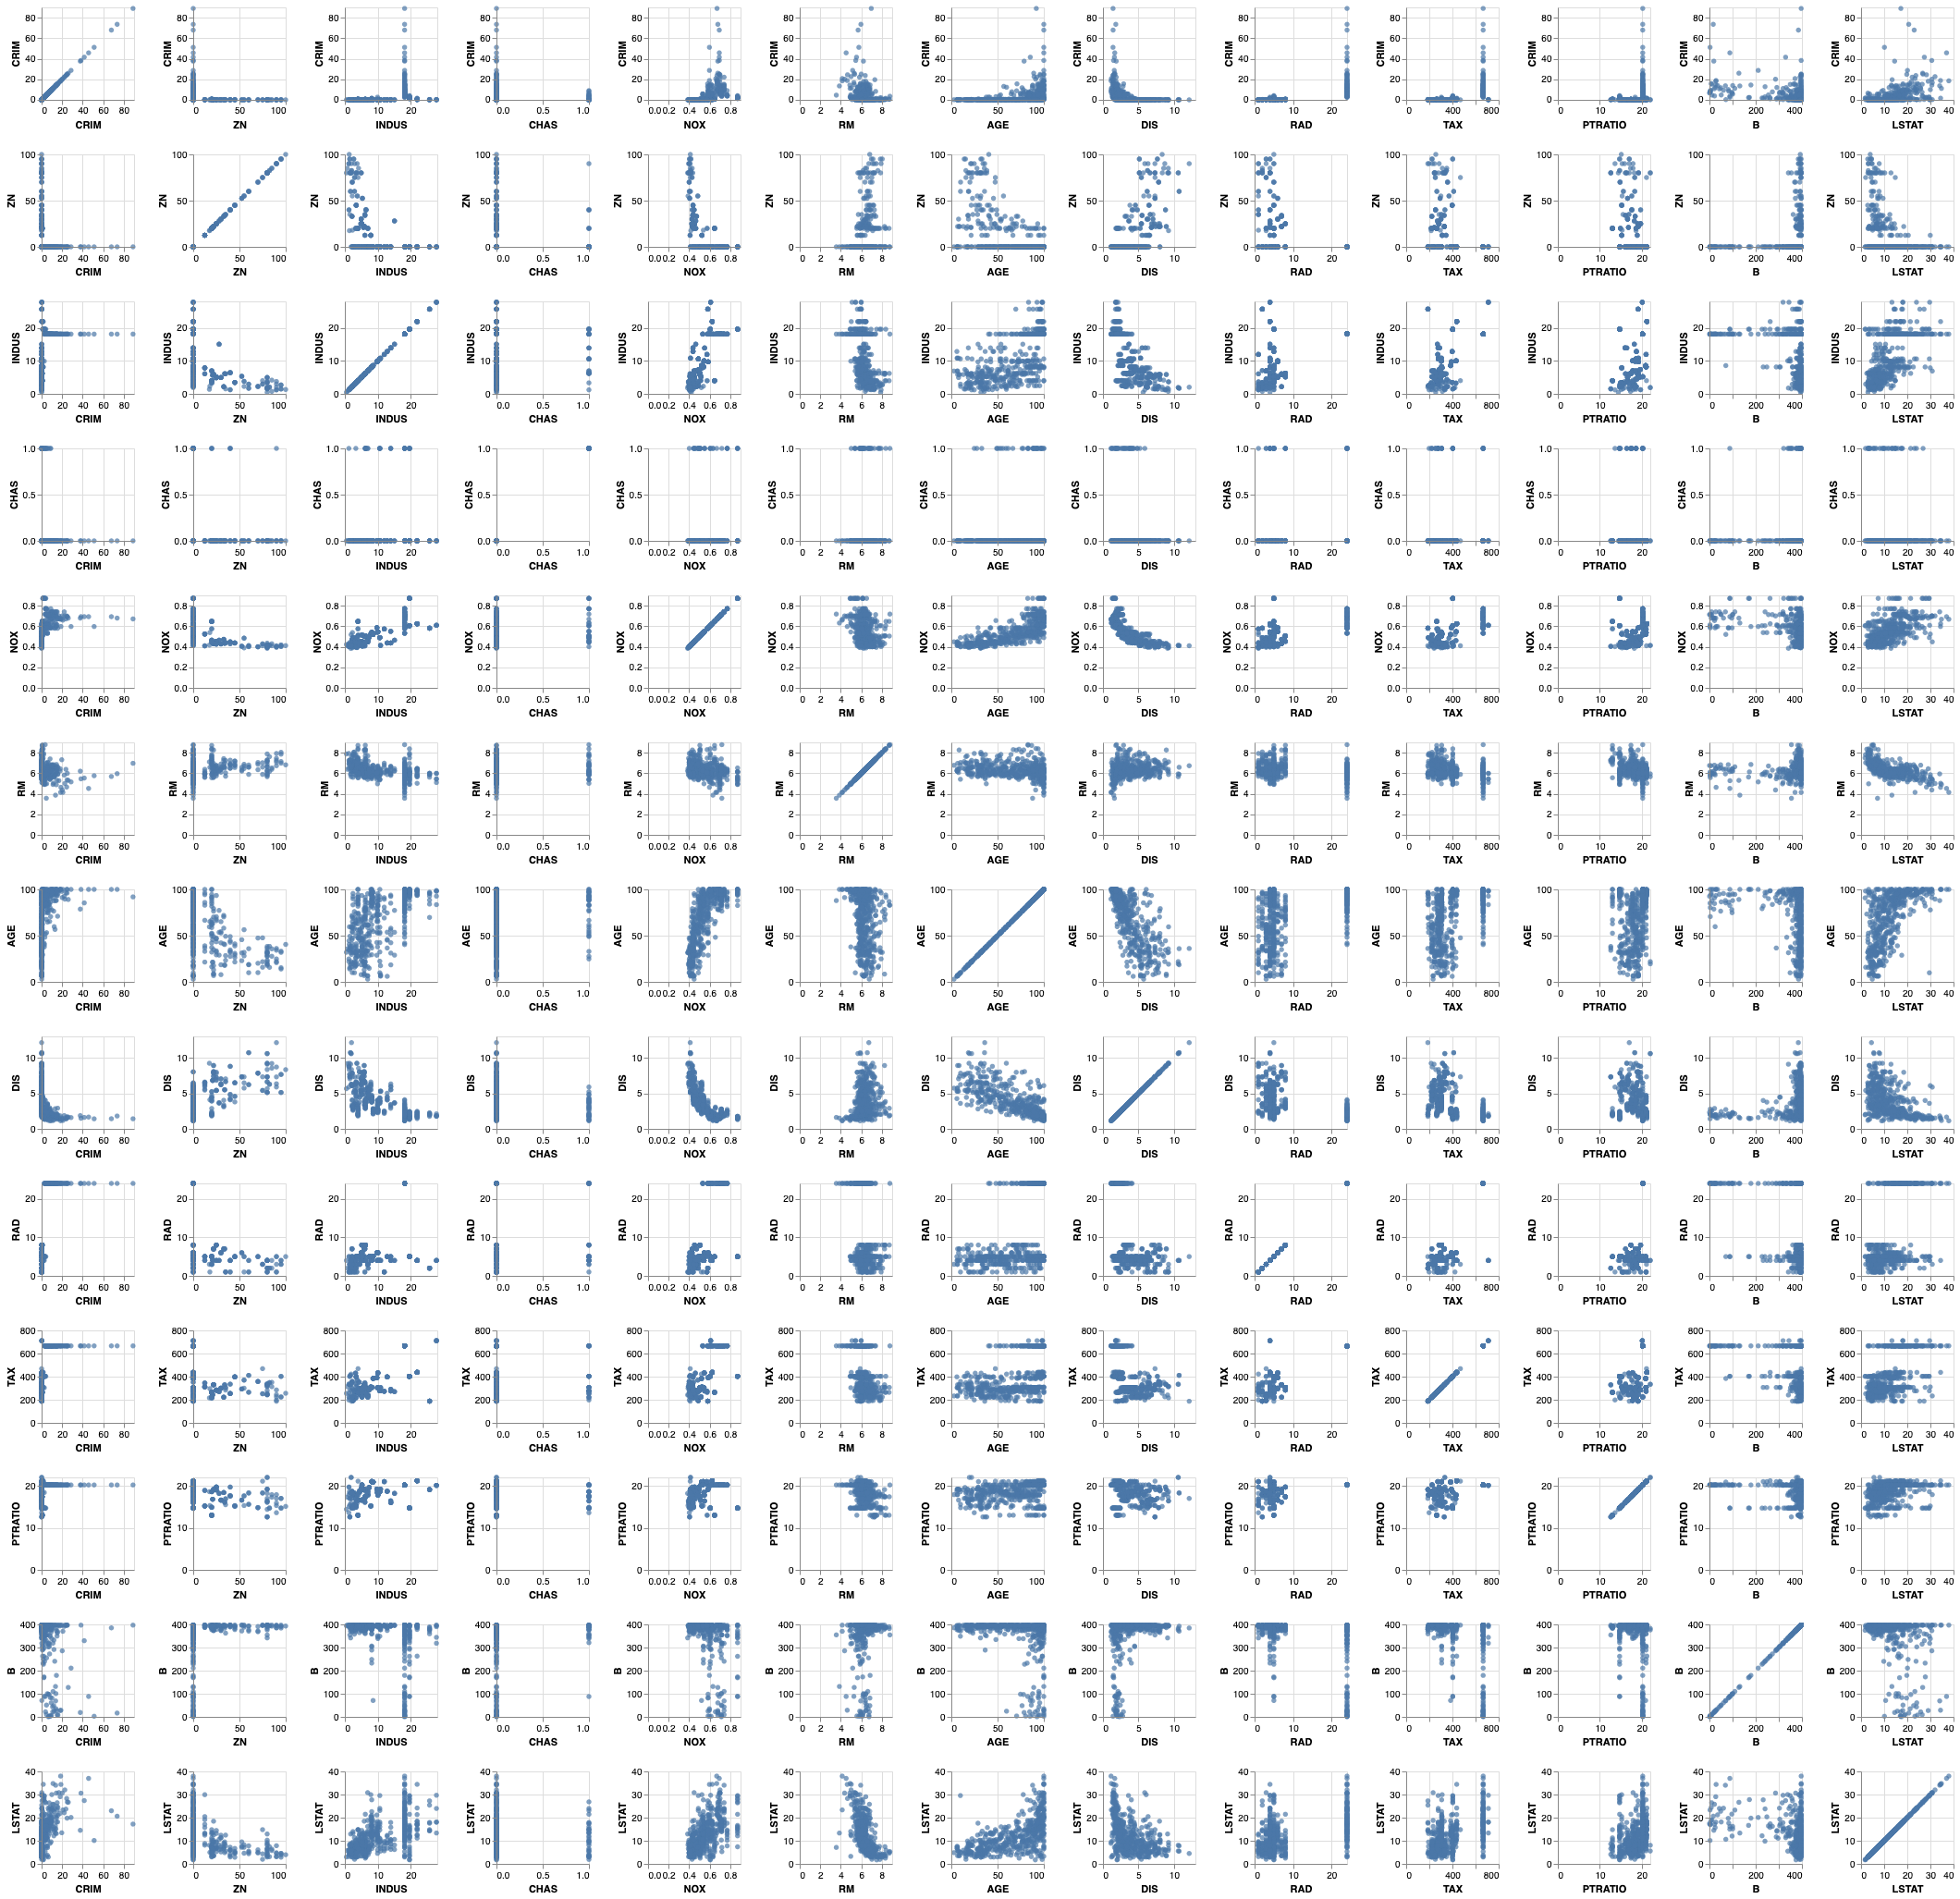

In [14]:
alt.Chart(boston_df).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=100,
    height=100
).repeat(
    row=list(boston_dataset.feature_names),
    column=list(boston_dataset.feature_names)
)

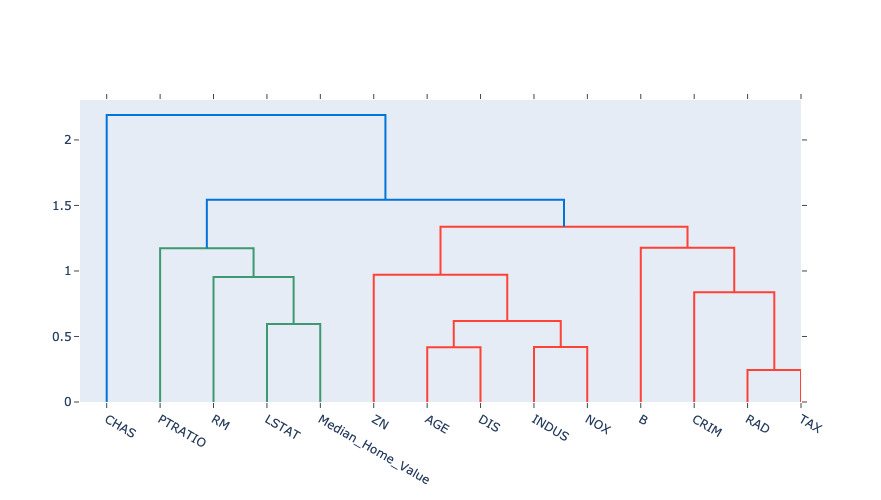

In [20]:
fig = ff.create_dendrogram(
    1 - np.abs(boston_df.corr()), 
    labels = boston_df.columns
)
fig.update_layout(width=800, height=500)
fig.show()

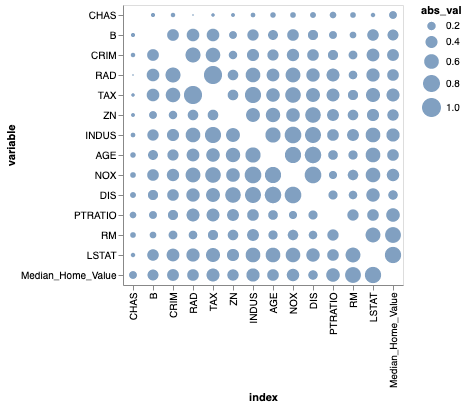

In [157]:
heatmap_data = boston_df.corr().reset_index(drop = False).melt(id_vars="index")
alt.Chart(heatmap_data).mark_circle().encode(
    x = alt.X("index", sort = dendrogram_order),
    y = alt.Y("variable", sort = dendrogram_order),
    #color = alt.condition("datum.value>0", alt.value("blue"), alt.value("red")),
    size = alt.condition("datum.value == 1",alt.value(0),"abs_val:Q")
).transform_calculate(
    abs_val = 'abs(datum.value)'
)

['CHAS',
 'B',
 'CRIM',
 'RAD',
 'TAX',
 'ZN',
 'INDUS',
 'AGE',
 'NOX',
 'DIS',
 'PTRATIO',
 'RM',
 'LSTAT',
 'Median_Home_Value']

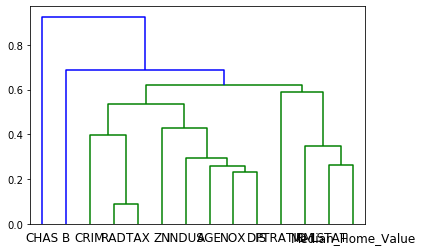

In [134]:
corr_condensed = hc.distance.squareform(1 - np.abs(boston_df.corr()) ) # convert to condensed
z = hc.linkage(corr_condensed, method='average')
dendrogram_order = hc.dendrogram(z, labels=boston_df.columns)["ivl"]
dendrogram_order

In [43]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median_Home_Value
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [48]:
%%HTML
<script src="https://d3js.org/d3.v5.min.js"></script> 

In [50]:
%%javascript
    var script = document.createElement('script');
    script.type = 'text/javascript';
    script.src = '//d3js.org/d3.v5.min.js';
    document.head.appendChild(script);
    console.log(window.d3)

<IPython.core.display.Javascript object>

In [190]:
d3_script = Template("""

var margin = {top: 10, right: 30, bottom: 30, left: 30},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

  var data = $data
  const links = data.links.map(d => Object.create(d));
  const nodes = data.nodes.map(d => Object.create(d));

  const simulation = d3.forceSimulation(nodes)
      .force("link", d3.forceLink(links).id(d => d.id).distance(100).strength(d => Math.pow(d.value,1)))
      .force("charge", d3.forceManyBody().strength(-75).distanceMax(350))
      .force("center", d3.forceCenter(width / 2, height / 2));

var svg = d3.select(element).append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

  const link = svg.append("g")
      .attr("stroke", "#999")
      .attr("stroke-opacity", 0.6)
    .selectAll("line")
    .data(links)
    .join("line")
      .attr("stroke-width", d => Math.sqrt(d.value));

  const node = svg.append("g")
      .attr("stroke", "#fff")
      .attr("stroke-width", 1.5)
    .selectAll("circle")
    .data(nodes)
    .join("circle")
      .attr("r", 5)
      .attr("fill", "blue")
      //.call(drag(simulation));

  node.append("title")
      .text(d => d.id);

  simulation.on("tick", () => {
    link
        .attr("x1", d => d.source.x)
        .attr("y1", d => d.source.y)
        .attr("x2", d => d.target.x)
        .attr("y2", d => d.target.y);

    node
        .attr("cx", d => d.x)
        .attr("cy", d => d.y);
  });

  //invalidation.then(() => simulation.stop());
""")

Javascript(d3_script.substitute(data=data))

<IPython.core.display.Javascript object>

In [185]:
data = {
    "nodes": [{"id": x} for x in list(boston_df.corr().index)],
    "links": [
        {
            "source": x["index"],
            "target": x["variable"],
            "value": abs(x["value"])
        }
        for x in boston_df.corr().reset_index(drop = False).melt(id_vars="index").to_dict("records")
        if x["index"] > x["variable"] and abs(x["value"])> 0.5
    ]
}

In [130]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median_Home_Value
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
